#### basic operations in pytorch
we will start with covering a set of basic operations in pytorch for manipulating tensor data

In [1]:
import torch

/Users/kosisochukwuasuzu/Developer/deeplearning-reference/.venv/lib/python3.13/site-packages/torch/_subclasses/functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"using device: {device}")


using device: mps


In [4]:
a = torch.tensor(2.0)
b = torch.tensor(3.0)

c = a + b
print(c)

tensor(5.)


In [10]:
# buildign a basic neural network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### understanding the machine learning pipeline
The machine learning pipeline consists of the following steps
- data ingestion
    - raw data collection
- data preperation
    - access quality efficiency
- modeling
    - model building
- training
    - measure diagnose adjust
- evaluation
    - testing debugging
- deployment
    - serving monitoring

In [ ]:
# data ingestion and preperation
distance = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

In [8]:
# modeling
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Linear(1, 1)
)


In [11]:
# training setup
loss_fn = nn.MSELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [13]:
# training loop
for epoch in range(500):
    optimizer.zero_grad()
    output = model(distance)
    loss = loss_fn(output, times)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# evaluation
with torch.no_grad():
    test_output = model(distance)
    test_loss = loss_fn(test_output, times)
    print(f"Test Loss: {test_loss.item():.4f}")

Epoch 0, Loss: 0.1022
Epoch 100, Loss: 0.1018
Epoch 200, Loss: 0.1017
Epoch 300, Loss: 0.1017
Epoch 400, Loss: 0.1017
Test Loss: 0.1017


##### reference impelmentation provided by the course notebook
reference implemention based on the course notebook

In [1]:
import dl_utils.plotting as plotting_utils
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
torch.manual_seed(42)

In [3]:
# Distances in miles for recent bike deliveries
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

In [4]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(1, 1))

In [5]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Training loop
for epoch in range(500):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances)
    # Calculate the loss
    loss = loss_function(outputs, times)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()
    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.03944866359233856
Epoch 100: Loss = 0.035811737179756165
Epoch 150: Loss = 0.0331188440322876
Epoch 200: Loss = 0.03112369030714035
Epoch 250: Loss = 0.029645616188645363
Epoch 300: Loss = 0.02855011820793152
Epoch 350: Loss = 0.0277385413646698
Epoch 400: Loss = 0.027137158438563347
Epoch 450: Loss = 0.026691725477576256
Epoch 500: Loss = 0.026361485943198204


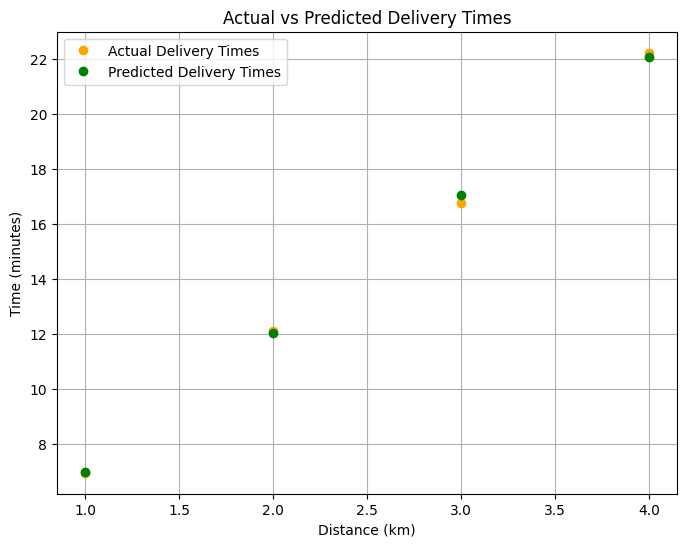

In [7]:
plotting_utils.plot_results(model, distances, times)

In [8]:
distance_to_predict = 7.0

In [10]:
with torch.no_grad():
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    predicted_time = model(new_distance)
    print(f"Predicted time for {distance_to_predict} miles: {predicted_time.item():.4f} minutes")
    if predicted_time.item() > 30:
        print("This is a long distance! do not take the job")
    else:
        print("This is a short distance! take the job")


Predicted time for 7.0 miles: 37.0935 minutes
This is a long distance! do not take the job
